In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import torch.nn.functional as F

In [5]:
farl_path = '/opt/data/269-single-timestep-EXP-1-head/070/sequences/EXP-1-head/timesteps/frame_00000/images-2x/cam_222200036_farl.npy'

features_for_image = np.load(farl_path)
inv_grid_path = farl_path.replace('farl.npy', 'inv_grid.npy')
inv_grid = np.load(inv_grid_path)
features_for_image = F.grid_sample(torch.tensor(features_for_image), torch.tensor(inv_grid), mode='bilinear', align_corners=False)
features_for_image = features_for_image.squeeze(0).permute(1,2,0).numpy()

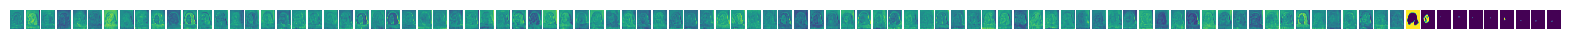

In [8]:
selected_channels = features_for_image[:, :, -100:-90] 

# Plot the channels side by side
fig, axes = plt.subplots(1, selected_channels.shape[-1], figsize=(20, 2))
for i in range(selected_channels.shape[-1]):
    axes[i].imshow(selected_channels[:,:,i], cmap='viridis')
    axes[i].axis('off')

plt.show()